In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
def load_data():
    data = pd.read_csv('data_traintest.csv')
    return data

tweet_df = load_data()
tweet_df.head()

,waktu,tweets,polarity
0,2022-09-18 06:09:26,rangkum aktivitas kader isu kembang kait parta...,1
1,2022-09-18 04:17:28,tunda milu periode cawapres nambah tahun dan l...,1
2,2022-09-17 17:31:57,purnawirawan jendral mantan presiden uang pasu...,0
3,2022-09-14 07:45:49,ahok peras rakyat iya pelan periode ma,1
4,2022-09-14 02:50:19,niat tunda milu,1


In [3]:
df = pd.DataFrame(tweet_df[['waktu', 'tweets', 'polarity']])
tweet_df.head()

,waktu,tweets,polarity
0,2022-09-18 06:09:26,rangkum aktivitas kader isu kembang kait parta...,1
1,2022-09-18 04:17:28,tunda milu periode cawapres nambah tahun dan l...,1
2,2022-09-17 17:31:57,purnawirawan jendral mantan presiden uang pasu...,0
3,2022-09-14 07:45:49,ahok peras rakyat iya pelan periode ma,1
4,2022-09-14 02:50:19,niat tunda milu,1


In [4]:
tweet_df.head()
Waktu = df['waktu']
result = []

# pengurangan tahun dan jam pada data waktu #
if len(df['waktu'][0]) != 5:
    for tgl in range(len(Waktu)):
        Waktu[tgl] = Waktu[tgl][5:10]

# waktu
df.head()
tanggal_fix = []


for i in Waktu:
    if i not in tanggal_fix:
        tanggal_fix.append(i)

jumlah_polarity = []
count = []
mines = []
plus = []

for i in range(len(tanggal_fix)):
    jumlah_polarity.append(0)
    count.append(0)
    mines.append(0)
    plus.append(0)

print(tanggal_fix)
for i in range(len(Waktu)):
    for j in range(len(tanggal_fix)):
        if df['waktu'][i] == tanggal_fix[j]:
            jumlah_polarity[j] += df["polarity"][i]
            count[j] += 1
            if df['polarity'][i] == 1:
                plus[j] += 1
            else:
                mines[j] += 1
            continue


print(plus, mines)
avg = []

for i in range(len(tanggal_fix)):
    avg.append(round((plus[i]-mines[i])/count[i], 2))


# print(tot)


<ipython-input-4-0a706595e95e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Waktu[tgl] = Waktu[tgl][5:10]


['09-18', '09-17', '09-14', '09-13', '09-12', '09-11', '09-10', '09-09', '09-23', '09-22', '09-21', '09-20', '09-19', '10-05', '10-04', '10-03', '10-02', '10-01', '09-30', '09-28', '09-27', '10-14', '10-13', '10-12', '10-11', '10-10', '10-09', '10-08', '10-07', '10-06', '09-15', '06-22', '06-21', '06-20', '06-19', '06-18', '06-17', '06-16', '06-15', '06-14', '06-13', '06-12', '06-09', '06-08', '06-07', '06-06', '06-05', '06-04', '06-03', '06-02', '06-01', '04-08']
[4, 0, 2, 2, 1, 1, 1, 1, 0, 4, 4, 1, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 2, 4, 0, 1, 0, 2, 290, 1, 2, 6, 5, 3, 6, 11, 16, 1, 1, 0, 1, 4, 4, 5, 8, 9, 3, 11, 8, 237] [4, 3, 0, 3, 2, 5, 0, 1, 1, 9, 6, 5, 1, 1, 1, 5, 1, 1, 0, 0, 3, 1, 1, 4, 1, 3, 2, 0, 2, 1, 264, 3, 8, 12, 6, 6, 3, 12, 13, 5, 2, 3, 2, 4, 5, 4, 10, 10, 3, 6, 2, 307]


In [5]:
import csv
from itertools import zip_longest
d = [tanggal_fix, jumlah_polarity, plus, mines, count, avg]
export_data = zip_longest(*d, fillvalue='')
with open('dataperhari.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(("tanggal", "jumlah sentimen", "positif", "negatif", "jumlah data", "rata_rata"))
    wr.writerows(export_data)
myfile.close()

In [6]:
# mengurutkan data
def load_data(datas):
    data = pd.read_csv(datas)
    return data

df2 = load_data('dataperhari.csv')
df2sorted = df2.sort_values(by=["tanggal"], ascending=True)
df2sorted

,tanggal,jumlah sentimen,positif,negatif,jumlah data,rata_rata
51,04-08,237,237,307,544,-0.13
50,06-01,8,8,2,10,0.60
49,06-02,11,11,6,17,0.29
48,06-03,3,3,3,6,0.00
47,06-04,9,9,10,19,-0.05
46,06-05,8,8,10,18,-0.11
45,06-06,5,5,4,9,0.11
44,06-07,4,4,5,9,-0.11
43,06-08,4,4,4,8,0.00
42,06-09,1,1,2,3,-0.33


In [7]:
print(df2['negatif'].tolist())

[4, 3, 0, 3, 2, 5, 0, 1, 1, 9, 6, 5, 1, 1, 1, 5, 1, 1, 0, 0, 3, 1, 1, 4, 1, 3, 2, 0, 2, 1, 264, 3, 8, 12, 6, 6, 3, 12, 13, 5, 2, 3, 2, 4, 5, 4, 10, 10, 3, 6, 2, 307]


<Figure size 3600x2400 with 0 Axes>

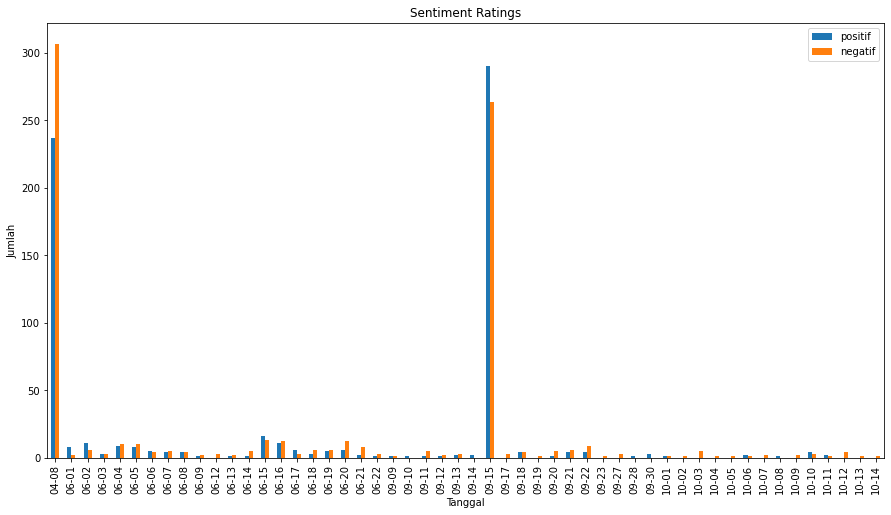

In [8]:
plt.figure(dpi=600)
plotdata = pd.DataFrame({
    "positif": df2sorted['positif'].tolist(),
    "negatif": df2sorted['negatif'].tolist()},
    index=df2sorted['tanggal']
)
plotdata.plot(kind="bar", figsize=(15, 8))

plt.title("Sentiment Ratings")

plt.xlabel("Tanggal")

plt.ylabel("Jumlah")
plt.savefig("gambar/diagram_sentimen_lexicon.png")
# plt.bar(bar_coords, date)
# plt.xticks(bar_coords, fix)
plt.show()

In [9]:
tweet_df.head()

,waktu,tweets,polarity
0,2022-09-18 06:09:26,rangkum aktivitas kader isu kembang kait parta...,1
1,2022-09-18 04:17:28,tunda milu periode cawapres nambah tahun dan l...,1
2,2022-09-17 17:31:57,purnawirawan jendral mantan presiden uang pasu...,0
3,2022-09-14 07:45:49,ahok peras rakyat iya pelan periode ma,1
4,2022-09-14 02:50:19,niat tunda milu,1


In [10]:
tweet_df['polarity'].value_counts()

0    757
1    667
Name: polarity, dtype: int64

In [12]:
def polarity_encode(x):
    if(x == 1):
        return 'Positif'
    if(x == 0):
        return 'Negatif'
tweet_df.polarity = tweet_df.polarity.apply(polarity_encode)
#tweet_df.head()

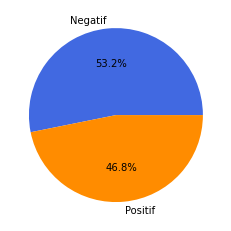

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (4, 4))
sizes = [count for count in tweet_df['polarity'].value_counts()]
labels = list(tweet_df['polarity'].value_counts().index)
colors = ['royalblue', 'darkorange']
explode = (0, 0)
ax.pie(x = sizes, labels = labels, colors = colors, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
plt.show()

In [16]:
tweet_df['polarity'].value_counts()

Negatif    757
Positif    667
Name: polarity, dtype: int64